# THIS Jupyter notebook contains the data for Video Games Sales Report and this analysis


In [1]:
#we will import all the required modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Initialy we will import the data from the sales folder.

vgs=pd.read_csv("Sales Data\gamesales.csv")

#the data is imported from the sales folder

In [3]:
vgs.head()
#this show the data 

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [4]:

vgs.shape
#number of rows and columns

(16598, 11)

In [5]:
vgs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  object 
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16596 non-null  float64
dtypes: float64(5), int64(1), object(5)
memory usage: 1.4+ MB


In [6]:
vgs.describe()

,Rank,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000,16596.000000
mean,8300.605254,0.263768,0.145958,0.077801,0.048070,0.537498
std,4791.853933,0.816594,0.505120,0.309294,0.188588,1.555113
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,41.490000,29.020000,10.220000,10.570000,82.740000


# now to analyze the data of the sales 

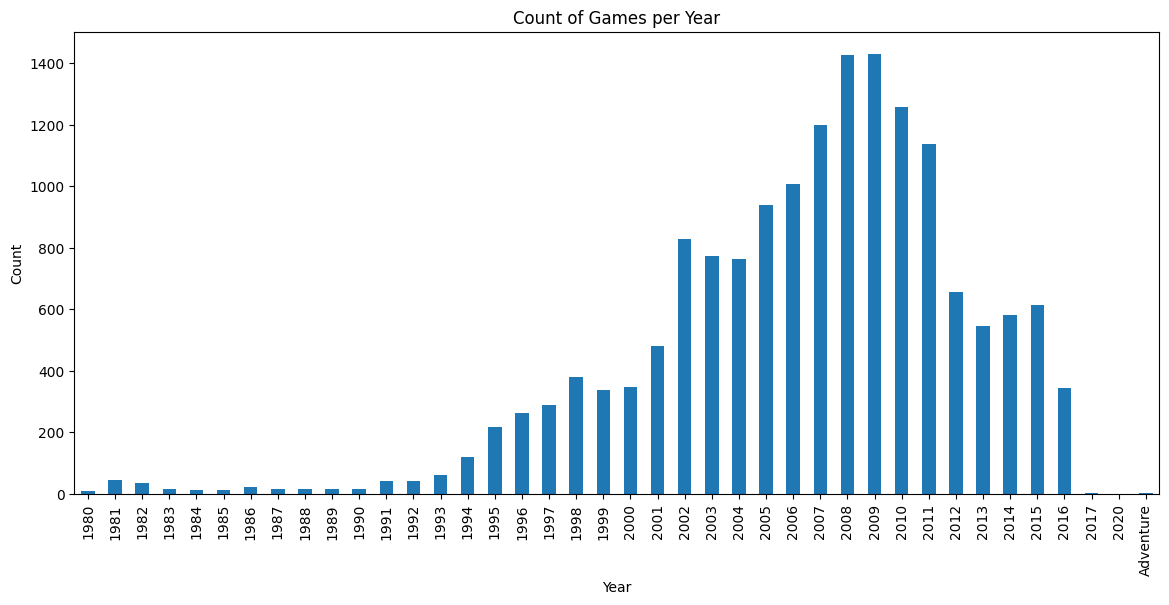

In [7]:

#This Graph show the overall sales of games over the years 

vgs['Year'].value_counts().sort_index().plot(kind='bar', figsize=(14, 6))
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Count of Games per Year')
plt.show()


<AxesSubplot: ylabel='Genre'>

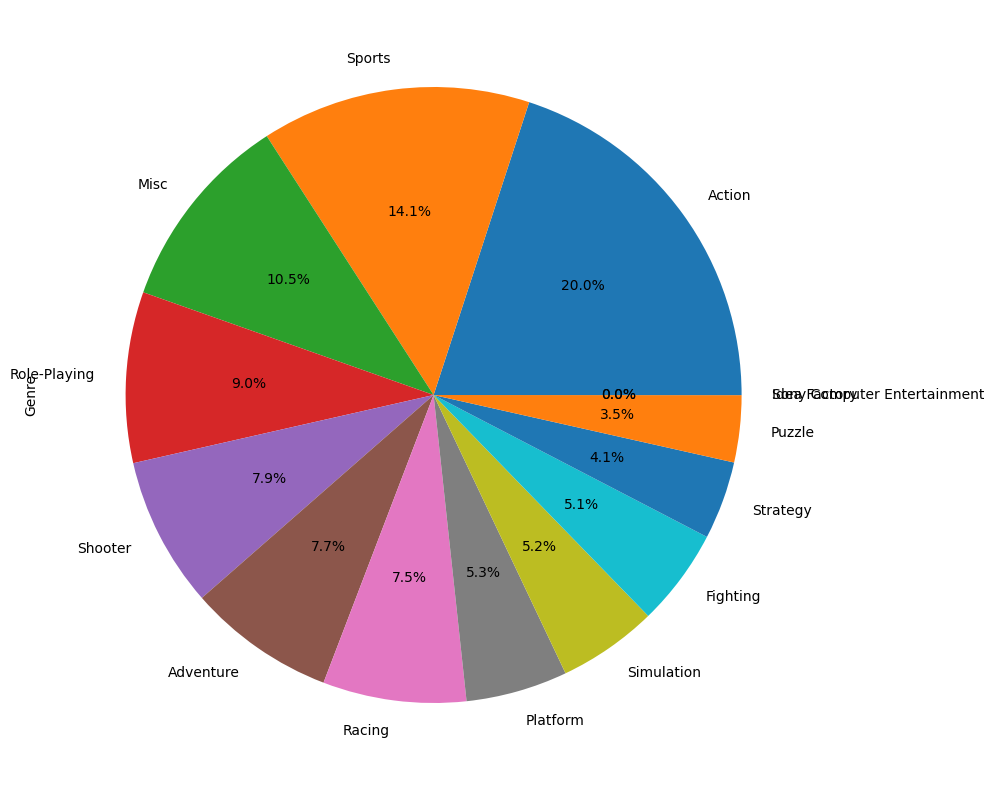

In [8]:
vgs['Genre'].value_counts().plot(kind='pie',figsize=(14,10),autopct='%1.1f%%')

#this pie chart show the overall sales of games on the basis of the genres 


In [9]:
vgs['Genre'].value_counts()


Action                         3316
Sports                         2346
Misc                           1739
Role-Playing                   1488
Shooter                        1310
Adventure                      1284
Racing                         1249
Platform                        886
Simulation                      867
Fighting                        848
Strategy                        681
Puzzle                          582
Sony Computer Entertainment       1
Idea Factory                      1
Name: Genre, dtype: int64

<AxesSubplot: >

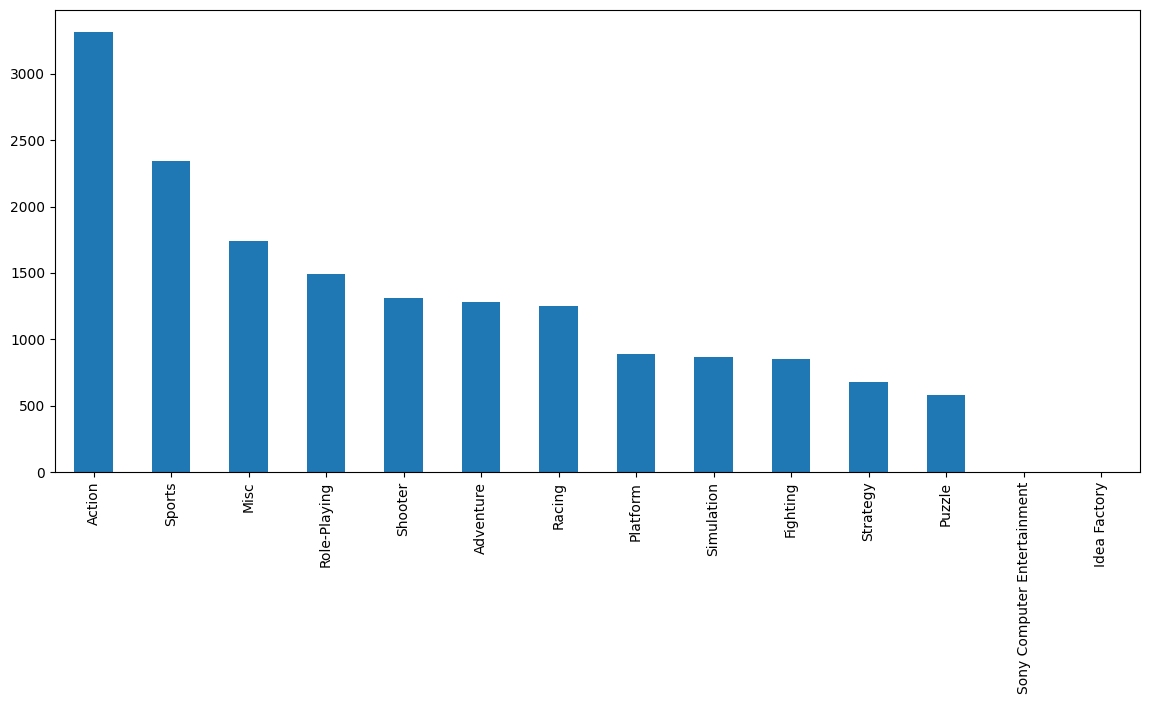

In [10]:
vgs['Genre'].dropna().value_counts().plot(kind='bar', figsize=(14, 6))


<AxesSubplot: >

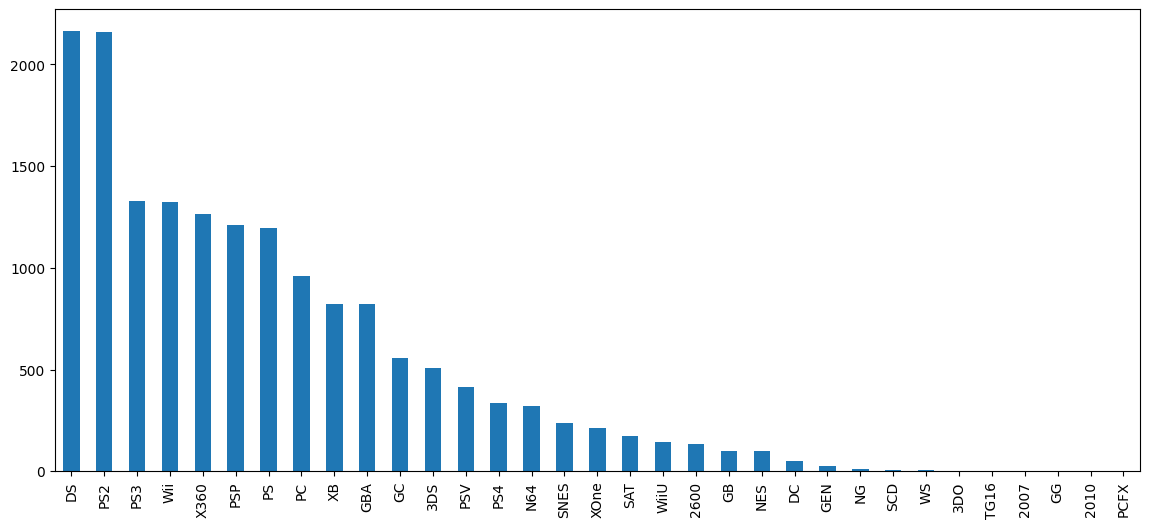

In [11]:
vgs['Platform'].value_counts().plot(kind='bar',figsize=(14,6))
#this graph show the different gaming platform used and it also indicate the which gaming platform is owned my people the most

In [12]:
vgs['Publisher'].value_counts()
#this show the publisher which has sold the most game 

Electronic Arts                 1351
Activision                       975
Namco Bandai Games               932
Ubisoft                          921
Konami Digital Entertainment     832
                                ... 
Warp                               1
New                                1
Elite                              1
Evolution Games                    1
UIG Entertainment                  1
Name: Publisher, Length: 579, dtype: int64

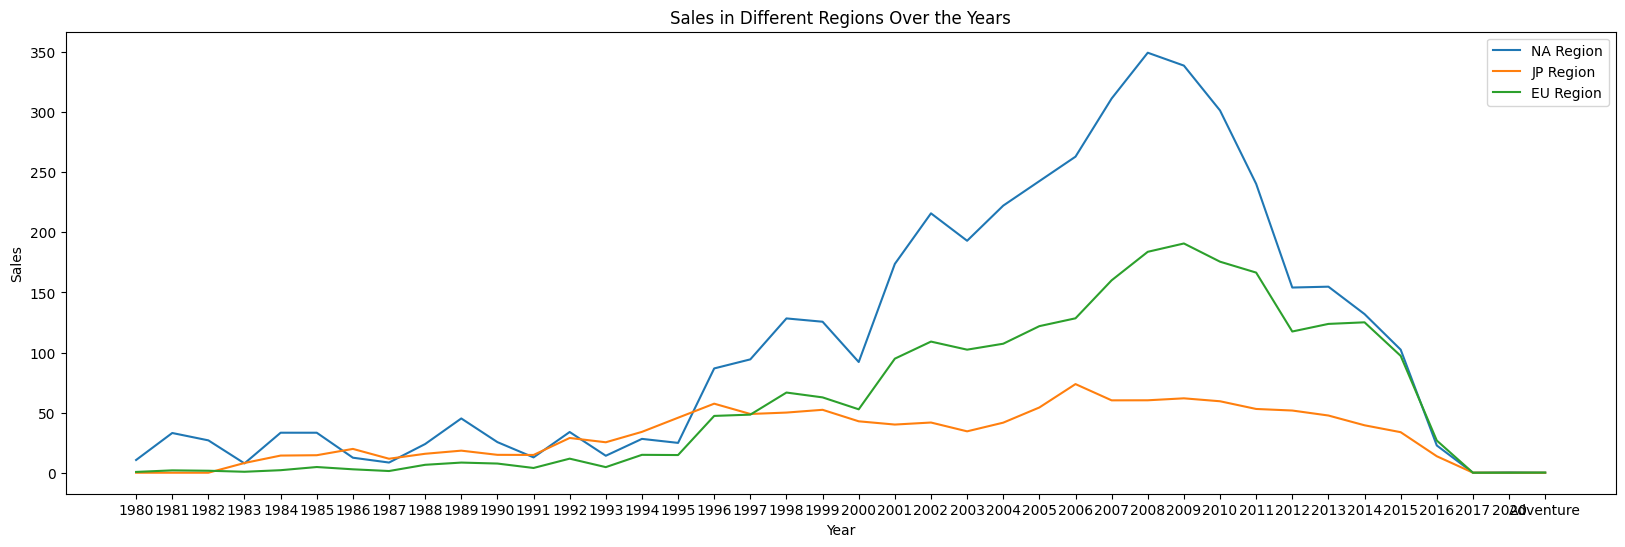

In [13]:
plt.figure(figsize=(20, 6))

plt.plot(vgs.groupby('Year')['NA_Sales'].sum(), label='NA Region')

plt.plot(vgs.groupby('Year')['JP_Sales'].sum(), label='JP Region')

plt.plot(vgs.groupby('Year')['EU_Sales'].sum(), label='EU Region')



plt.xlabel('Year')
plt.ylabel('Sales')
plt.title('Sales in Different Regions Over the Years')
plt.legend()
plt.show()

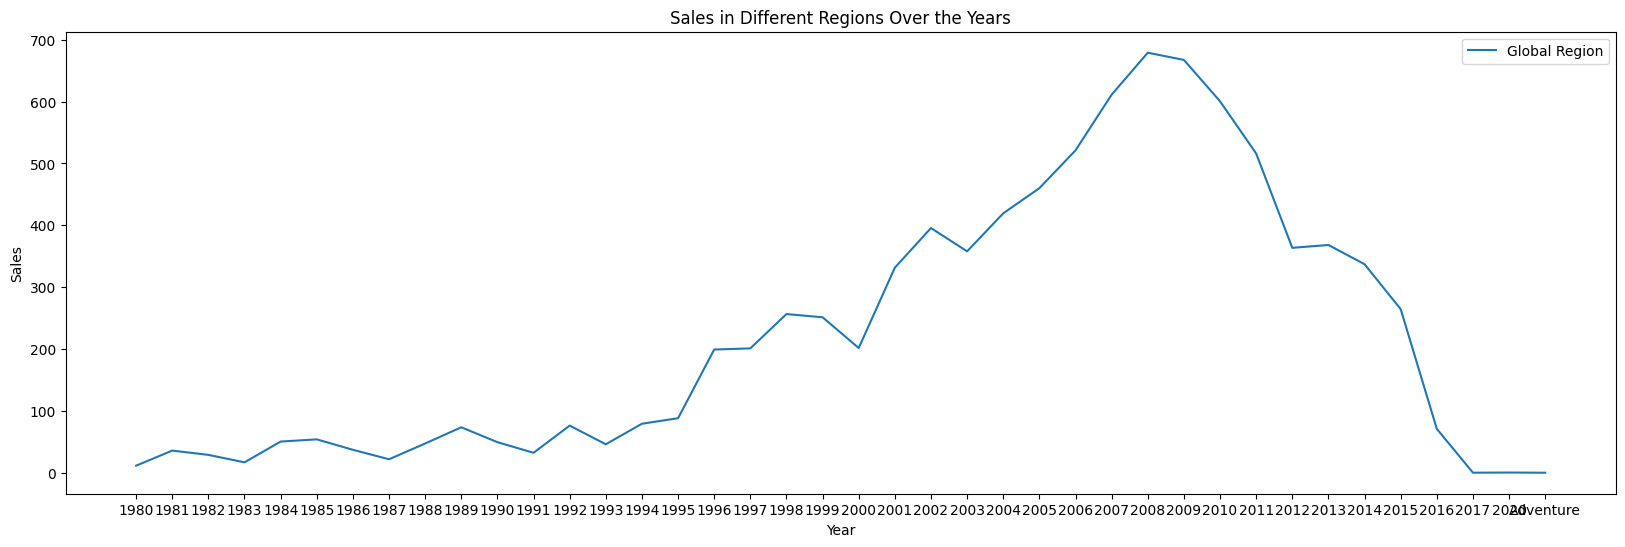

In [14]:
plt.figure(figsize=(20, 6))

plt.plot(vgs.groupby('Year')['Global_Sales'].sum(), label='Global Region')

plt.xlabel('Year')
plt.ylabel('Sales')
plt.title('Sales in Different Regions Over the Years')
plt.legend()
plt.show()

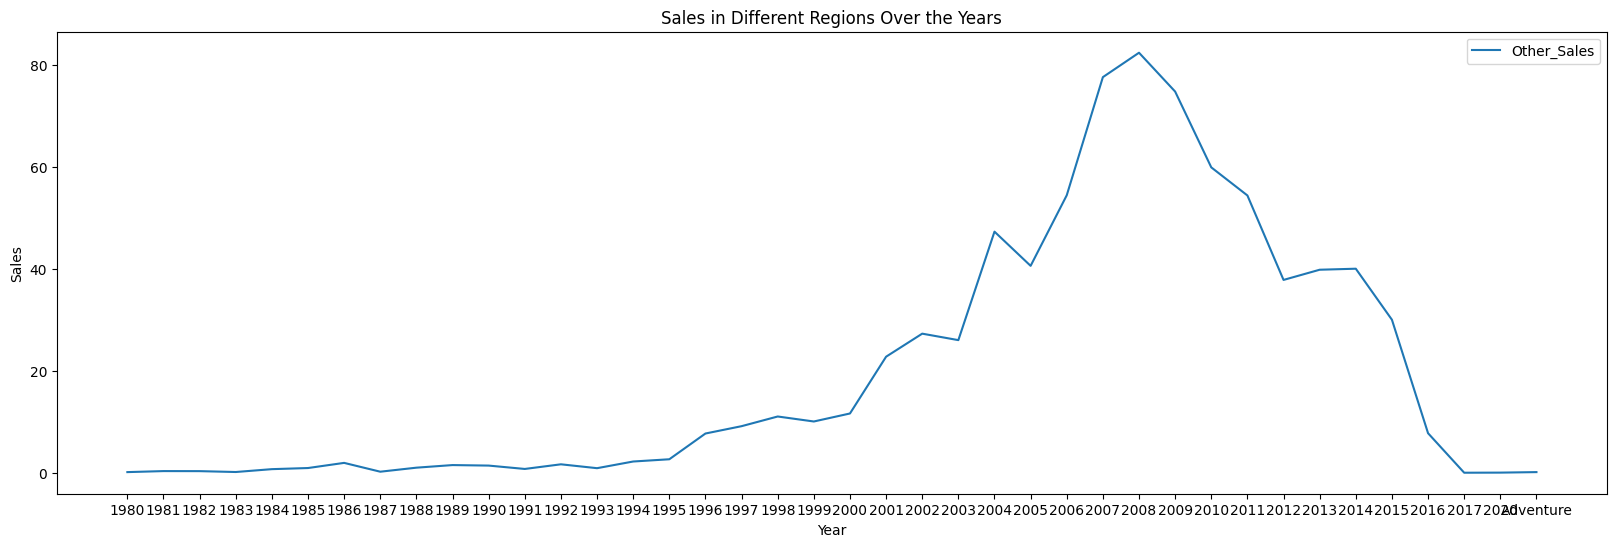

In [15]:
plt.figure(figsize=(20, 6))
plt.plot(vgs.groupby('Year')['Other_Sales'].sum(), label='Other_Sales')

plt.xlabel('Year')
plt.ylabel('Sales')
plt.title('Sales in Different Regions Over the Years')
plt.legend()
plt.show()

In [16]:
# Create a new column 'Total_Sales' representing the sum of sales in all regions
vgs['Total_Sales'] = vgs['NA_Sales'] + vgs['EU_Sales'] + vgs['JP_Sales'] + vgs['Other_Sales']


In [17]:
vgs['Total_Sales'].describe()

count    16598.000000
mean         0.535597
std          1.554730
min          0.000000
25%          0.060000
50%          0.170000
75%          0.470000
max         82.740000
Name: Total_Sales, dtype: float64

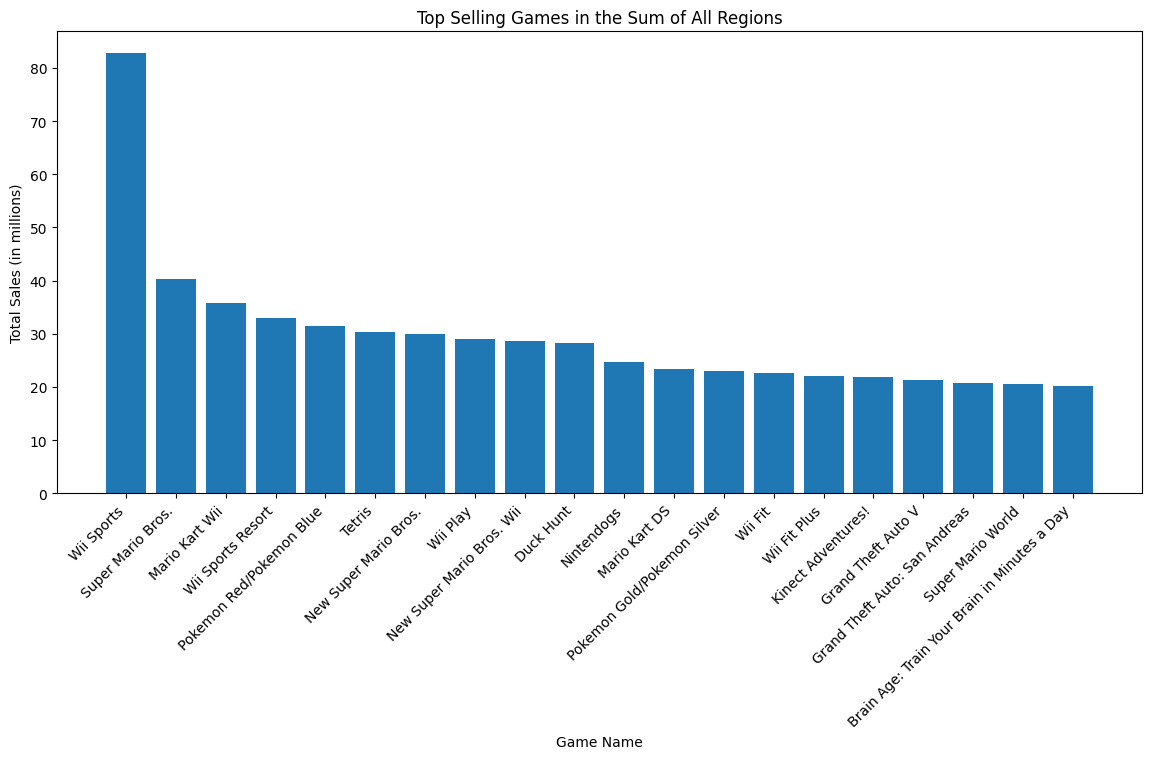

In [18]:


# Sort the DataFrame by 'Total_Sales' in descending order
sorted_vgs = vgs.sort_values(by='Total_Sales', ascending=False)

# Extract the top-selling games and their total sales
top_games = sorted_vgs[['Name', 'Total_Sales']].head(20)  # Adjust the number as needed

# Plot the bar graph
plt.figure(figsize=(14, 6))
plt.bar(top_games['Name'], top_games['Total_Sales'])
plt.xlabel('Game Name')
plt.ylabel('Total Sales (in millions)')
plt.title('Top Selling Games in the Sum of All Regions')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()


# correlation of the data

In [19]:
corrvgs = vgs.corr()
corrvgs

,Rank,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Total_Sales
Rank,1.000000,-0.400030,-0.377214,-0.267929,-0.332956,-0.427397,-0.426351
NA_Sales,-0.400030,1.000000,0.767184,0.450040,0.634591,0.940787,0.940989
EU_Sales,-0.377214,0.767184,1.000000,0.435754,0.725869,0.902290,0.902577
JP_Sales,-0.267929,0.450040,0.435754,1.000000,0.290260,0.611874,0.612094
Other_Sales,-0.332956,0.634591,0.725869,0.290260,1.000000,0.748329,0.748180
Global_Sales,-0.427397,0.940787,0.902290,0.611874,0.748329,1.000000,0.999775
Total_Sales,-0.426351,0.940989,0.902577,0.612094,0.748180,0.999775,1.000000


([<matplotlib.axis.YTick at 0x20d74866bc0>,
 [Text(0, 0, 'Rank'),
  Text(0, 1, 'NA_Sales'),
  Text(0, 2, 'EU_Sales'),
  Text(0, 3, 'JP_Sales'),
  Text(0, 4, 'Other_Sales'),
  Text(0, 5, 'Global_Sales'),
  Text(0, 6, 'Total_Sales')])

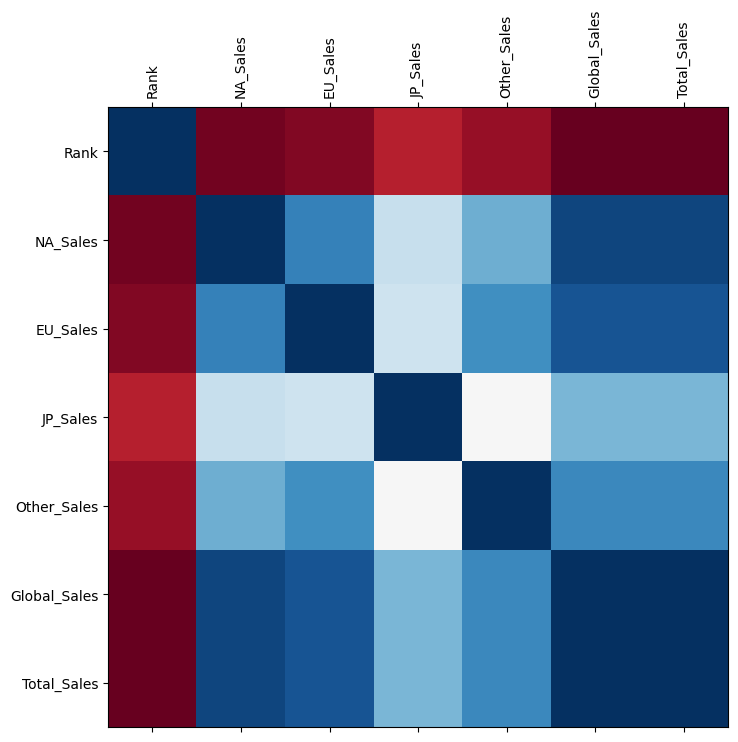

In [20]:
fig = plt.figure(figsize=(8,8))
plt.matshow(corrvgs,cmap='RdBu',fignum=fig.number)
plt.xticks(range(len(corrvgs.columns)),corrvgs.columns,rotation='vertical');
plt.yticks(range(len(corrvgs.columns)),corrvgs.columns)
#high corr in blue and red is less